In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')

In [3]:
train.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train['date'] = pd.to_datetime(train["Timestamp"],unit="s").dt.date

In [8]:
data = train.groupby('date')

In [9]:
data

In [11]:
close = data['Close'].mean()

In [12]:
close

date
2011-12-31        4.482500
2012-01-01        4.806667
2012-01-02        5.000000
2012-01-03        5.252500
2012-01-04        5.223333
                  ...     
2020-12-27    27046.212924
2020-12-28    26965.146806
2020-12-29    26670.904931
2020-12-30    28142.405785
2020-12-31    28928.490000
Name: Close, Length: 3286, dtype: float64

In [16]:
close_train=close.iloc[:len(close)-30]
close_test=close.iloc[len(close_train):]

In [17]:
import numpy as np

In [22]:
close_train=np.array(close_train)

In [26]:
close_train=close_train.reshape(close_train.shape[0],1)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler=MinMaxScaler(feature_range=(0,1))
#ranged it between 0 and 1 so that the later(big) values do not affect the modelt oo adversely

In [31]:
close_scaled=scaler.fit_transform(close_train)

In [32]:
timestep=30
x_train=[]
y_train=[]

for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])

In [36]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) 

In [39]:
x_train.shape

(3226, 30, 1)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model=Sequential()

model.add(LSTM(units = 20,input_shape=(None,1),activation="relu"))
model.add(Dense(units = 1))


model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,,batch_size=32,epochs=150)

Epoch 1/150
101/101 [==============================] - 5s 46ms/step - loss: 0.0080
Epoch 2/150
101/101 [==============================] - 5s 53ms/step - loss: 5.4151e-04
Epoch 3/150
101/101 [==============================] - 5s 45ms/step - loss: 3.9076e-04
Epoch 4/150
101/101 [==============================] - 5s 46ms/step - loss: 3.5533e-04
Epoch 5/150
101/101 [==============================] - 4s 44ms/step - loss: 3.4923e-04
Epoch 6/150
101/101 [==============================] - 5s 48ms/step - loss: 3.3070e-04
Epoch 7/150
101/101 [==============================] - 5s 49ms/step - loss: 3.2215e-04
Epoch 8/150
101/101 [==============================] - 5s 53ms/step - loss: 3.1503e-04
Epoch 9/150
101/101 [==============================] - 5s 51ms/step - loss: 3.2027e-04
Epoch 10/150
101/101 [==============================] - 4s 44ms/step - loss: 3.0004e-04
Epoch 11/150
101/101 [==============================] - 5s 47ms/step - loss: 2.9696e-04
Epoch 12/150
101/101 [=======================

101/101 [==============================] - 5s 49ms/step - loss: 1.1475e-04
Epoch 95/150
101/101 [==============================] - 6s 57ms/step - loss: 1.3027e-04
Epoch 96/150
101/101 [==============================] - 5s 48ms/step - loss: 1.2006e-04
Epoch 97/150
101/101 [==============================] - 5s 50ms/step - loss: 1.2275e-04
Epoch 98/150
101/101 [==============================] - 5s 45ms/step - loss: 1.1316e-04
Epoch 99/150
101/101 [==============================] - 5s 45ms/step - loss: 1.1857e-04
Epoch 100/150
101/101 [==============================] - 5s 48ms/step - loss: 1.1316e-04
Epoch 101/150
101/101 [==============================] - 5s 49ms/step - loss: 1.2391e-04
Epoch 102/150
101/101 [==============================] - 5s 48ms/step - loss: 1.1749e-04
Epoch 103/150
101/101 [==============================] - 5s 46ms/step - loss: 1.1671e-04
Epoch 104/150
101/101 [==============================] - 5s 53ms/step - loss: 1.1986e-04
Epoch 105/150
101/101 [=================

In [48]:
input1=close[len(data)-len(close_test)-timestep:]
inputs=input1.values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [53]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [83]:
predicted=model.predict(x_test)

In [84]:
predicted=scaler.inverse_transform(predicted)

In [89]:
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

In [90]:
import matplotlib.pyplot as plt

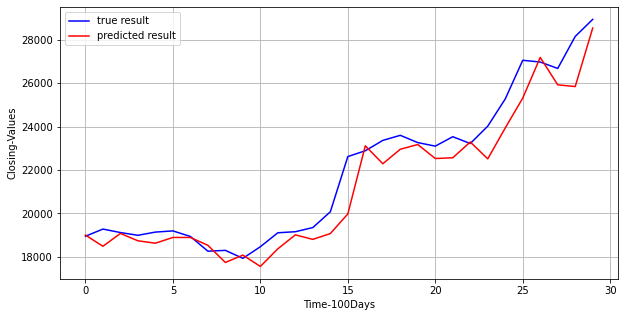

In [99]:
plt.figure(figsize=(10,5))
plt.plot(data_test,color="b",label="true result")
plt.plot(predicted,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time-100Days")
plt.ylabel("Closing-Values")
plt.grid(True)
plt.show()

In [101]:
from sklearn.metrics import r2_score
r2_score(data_test,predicted)

0.9171000458400823